Required Libraries

In [ ]:
!pip install opencv-python
!pip install scikit-learn
!pip install tensorflow
!pip install matplotlib

Importing the required libraries for the code.

In [87]:
import os
import io
import keras
import cv2
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

import sys
# Add the scripts folder to the system path
sys.path.append(os.path.abspath("../scripts"))
# Import and execute the dataset download function
from download_image_dataset import download_dataset
download_dataset()

# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

Dataset already exists. Skipping download.


Feature Selection

In [90]:
X_train = []
Y_train = []
image_size = 150
labels = ['adenocarcinoma','large.cell.carcinoma','normal','squamous.cell.carcinoma']
for i in labels:
    folderPath = os.path.join('../data/train/', i)
    print(folderPath)
    for j in os.listdir(folderPath):
        print(j)
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
for i in labels:
    folderPath = os.path.join('../data/test/', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

../data/train/adenocarcinoma
000000 (6).png
000005 (3).png
000005 (9).png
000008 (10).png
000009 (3).png
000009 (7).png
000013 (4).png
000013 (8).png
000014 (7).png
000015 (10).png
000015 (4).png
000015 (9).png
000016 (9).png
000017 (6).png
000017 (8).png
000018 (5).png
000019 (5).png
000020 (10).png
000020 (5).png
000020 (6).png
000021 (3).png
000021 (4).png
000021 (5).png
000021 (6).png
000021 (8).png
000022 (10).png
000022 (2).png
000022 (8).png
000022 (9).png
000022.png
000023 (10).png
000023 (5).png
000023 (7).png
000023 (9).png
000024 (10).png
000024 (6).png
000024 (7).png
000024.png
000025 (6).png
000026 (10).png
000026 (3).png
000027 (4).png
000027 (6).png
000029 (4).png
000029 (5).png
000029 (9).png
000030 (4).png
000031 (3).png
000032 (8).png
000033 (9).png
000034 (6).png
000035 (4).png
000035 (5).png
000035 (6).png
000035 (8).png
000036 (6).png
000036 (7).png
000040 (10).png
000040 (3).png
000040 (5).png
000041 (2).png
000041 (4).png
000041 (7).png
000041 (8).png
000042 (10)

Shuffling the dataset images

In [92]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(928, 150, 150, 3)

Training , Testing and Spliting the dataset

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

convolutional neural network

In [96]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))   
model.add(Dropout(0,3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu')) 
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(128,(3,3),activation='relu')) 
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(4,activation='softmax'))

C:\Users\yoshi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the Model.

In [99]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Training the Model.

In [101]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.1,batch_size=32 )

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 729ms/step - accuracy: 0.2405 - loss: 1.7599 - val_accuracy: 0.5119 - val_loss: 1.2701
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 724ms/step - accuracy: 0.4369 - loss: 1.2415 - val_accuracy: 0.5714 - val_loss: 1.0247
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 719ms/step - accuracy: 0.4791 - loss: 1.0904 - val_accuracy: 0.5714 - val_loss: 1.0180
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 697ms/step - accuracy: 0.4743 - loss: 1.0357 - val_accuracy: 0.6667 - val_loss: 0.7217
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 717ms/step - accuracy: 0.5429 - loss: 0.8906 - val_accuracy: 0.7024 - val_loss: 0.7031
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 765ms/step - accuracy: 0.6566 - loss: 0.7603 - val_accuracy: 0.7738 - val_loss: 0.6159
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 760ms/step - accuracy: 0.7308 - loss: 0.6448 - val_accuracy: 0.7262 - val_loss: 0.5912
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 735ms/step - accuracy: 0.7922 - loss: 0.5192 - val_accu

Saving the Model.

In [103]:
model.save('lung_cancer_detection.h5')

Graphs.

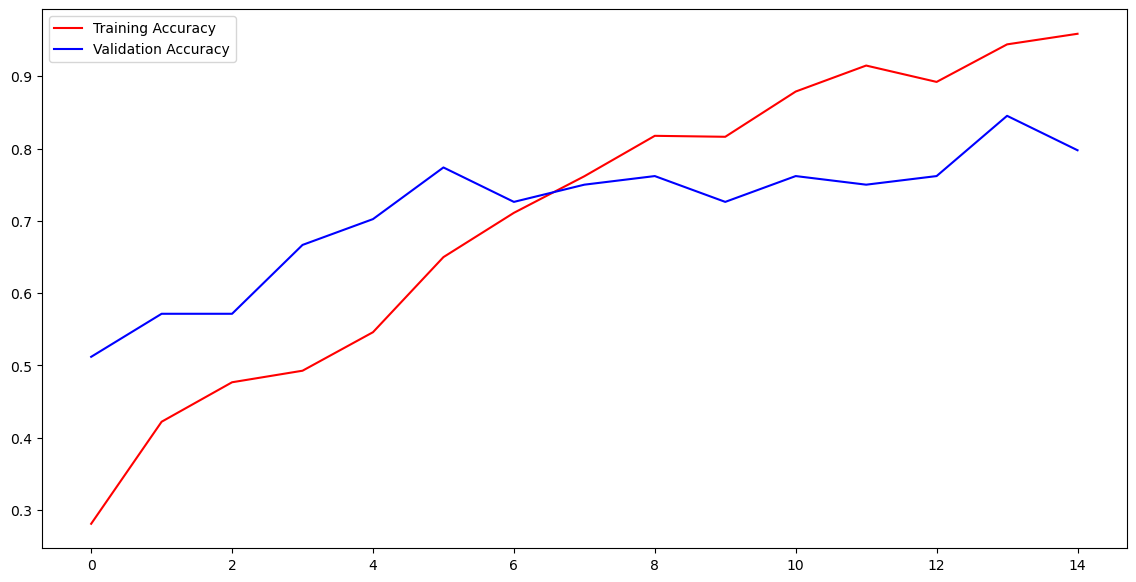

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label = "Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

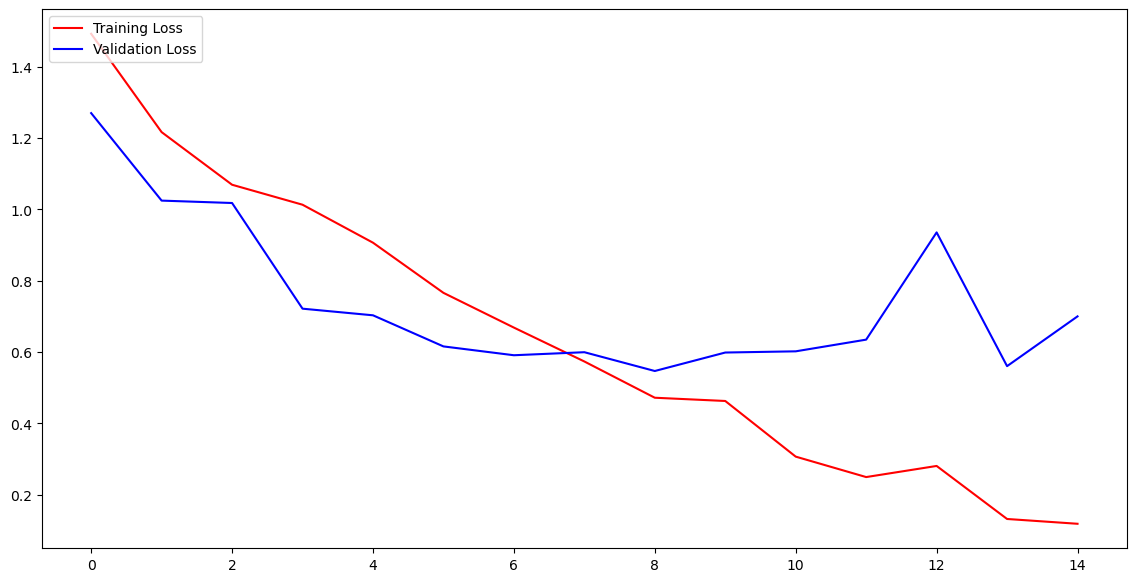

In [108]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label = "Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.legend(loc='upper left')
plt.show()

Testing the Model with an Image.

In [113]:
img = cv2.imread('../data/test/squamous.cell.carcinoma/000115 (4).png')
img =cv2.resize(img,(150,150))
img_array= np.array(img)
img_array = img_array.reshape(1,150,150,3)

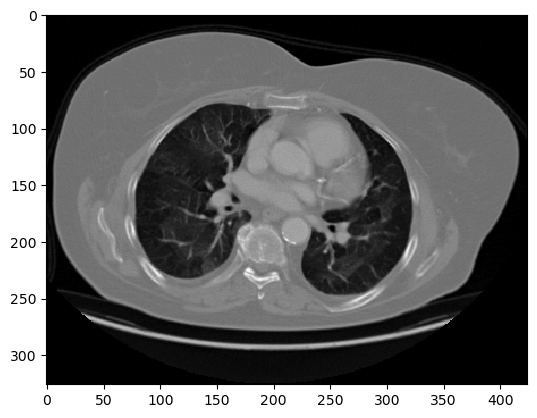

In [115]:
img = image.load_img("../data/test/squamous.cell.carcinoma/000115 (4).png")
plt.imshow(img,interpolation = 'nearest')

In [116]:
a = model.predict(img_array)
indices = a.argmax()
indices
print(f"Predicted Class Index: {indices}, Predicted Class: {labels[indices]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted Class Index: 3, Predicted Class: squamous.cell.carcinoma


Classification Report.

In [118]:
# Code snippet to integrate into the notebook for generating a classification report

y_pred = model.predict(X_test)

# Convert predictions and true labels from one-hot encoding to label indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Define the labels used in the dataset
labels = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

classification_rep = classification_report(y_test_classes, y_pred_classes, target_names=labels)

print("Classification Report:\n")
print(classification_rep)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step
Classification Report:

                         precision    recall  f1-score   support

         adenocarcinoma       0.59      0.92      0.72        25
   large.cell.carcinoma       1.00      0.47      0.64        19
                 normal       0.96      0.96      0.96        26
squamous.cell.carcinoma       0.84      0.70      0.76        23

               accuracy                           0.78        93
              macro avg       0.85      0.76      0.77        93
           weighted avg       0.84      0.78      0.78        93



Confusion Matrix.

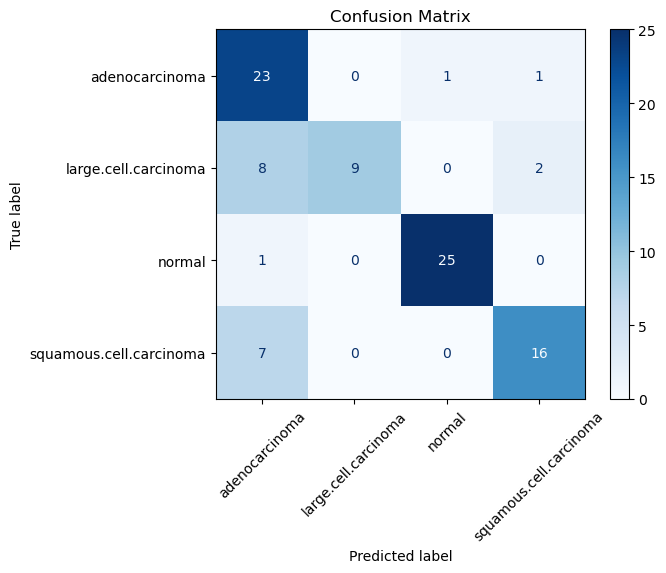

In [120]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)

# Customize the plot
plt.title("Confusion Matrix")
plt.show()